In [1]:
# calculate the mean and standard deviation of each window


In [20]:
import xml
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import numpy as np
import random 

%matplotlib inline

def get_strokes(path):
    root = ET.parse(path).getroot()
    root
    strokes = root[1]

    #print("Strokes", len(strokes))

    stroke_list = []
    for stroke in strokes:
        x_coords = []
        y_coords = []
        for point in stroke:
            #print("Points", len(strokes))
            x,y = point.attrib["x"], point.attrib["y"]
            x_coords.append(int(x))
            y_coords.append(-int(y))
            #print(x,y)
        stroke_list.append({"x":x_coords, "y":y_coords})
    return stroke_list

def plot(stroke_list, coef=0, save_path=""):
    #plt.NullFormatter()
    plt.figure(dpi=300)
    plt.axis('off')
    #plt.axis('equal')
    plt.axis('square')

    def sub_x(x, coef):
        _x = np.array(x)
        _x_subtract = np.zeros(_x.shape[0])
        for i in range(coef.shape[0]):
            _x_subtract += _x**(i+1) * coef[i]
            #print(_x_subtract, _x, i)
        return _x_subtract


#     linewidth=random.randint(0,10)
#     linewidth=random.random()*2+.25
    linewidth=max(random.gauss(1,.5),.25)
    adj_stroke_list = []
    for stroke in stroke_list:
        _x_subtract = sub_x(stroke["x"], coef) if isinstance(coef, np.ndarray) else 0
            
        adj_y = np.array(stroke["y"])-_x_subtract
        adj_stroke_list.append(adj_y)
        #print(stroke["x"],stroke["y"])
        plt.plot(stroke["x"],adj_y, linewidth=linewidth, color="black")

    y_min = min([min(y) for y in adj_stroke_list])
    y_max = max([max(y) for y in adj_stroke_list])
    x_min = min([min(x["x"]) for x in stroke_list])
    x_max = max([max(x["x"]) for x in stroke_list])

    plt.ylim([y_min-5, y_max+5])
    plt.xlim([x_min-5, x_max+5])

    if save_path:
        plt.savefig(save_path)
        plt.close()
    else:
        plt.show()
           

In [21]:
def convert_stroke_list(stroke_list):
    x,y = [],[]
    [x.extend(key["x"]) for key in stroke_list]
    [y.extend(key["y"]) for key in stroke_list]
    return np.array(x),np.array(y)


In [22]:
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge, HuberRegressor
import pandas as pd
def movingaverage(data, window_width, stat="mean"):
    if stat=="mean":        
#         cumsum_vec = np.cumsum(np.insert(data, 0, 0)) 
#         ma_vec = (cumsum_vec[window_width:] - cumsum_vec[:-window_width]) / window_width
#         return ma_vec
        return pd.DataFrame(data).rolling(window_width).mean().to_numpy()
    elif stat=="median":
        return pd.DataFrame(data).rolling(window_width).median().to_numpy()
    elif stat=="quantile":
        return pd.DataFrame(data).rolling(window_width).quantile(.25).to_numpy()
    elif stat=="none":
        return np.zeros(data.shape[0])

def get_coef(x,y, version="median"):
    coords = np.column_stack((x,y))
    coords.sort(axis=0)
    #learner = LinearRegression() # Lasso() 
    #learner = Ridge(10000000000000000)
    learner = Lasso()
    
    y_avg = movingaverage(coords[:,1], window_size, stat=version)

    # Median of the minimum number
    
    X, Y = x.reshape(-1,1)[window_size:], y_avg.reshape(-1,1)[window_size:]
    X = np.c_[X]
    reg = learner.fit(X,Y)
    #print(reg.coef_)

    #plt.plot(X, y_avg)
    #plt.hlines(-4700, 1000, 6000)
    if isinstance(learner, Lasso):
        coef = reg.coef_
    else:
        coef = reg.coef_[0]
        
    return coef*.7

def main(xml_path, save_path=None):
    stroke_list = get_strokes(xml_path)
    x,y = convert_stroke_list(stroke_list)
    coef = get_coef(x,y, "mean")
    plot(stroke_list, coef, save_path=save_path)



[1043 1037 1032 1023 1014 1003  989  976  961  948  926  933  945  960
  976  994 1009 1025 1070 1074 1079 1083 1086 1088 1088 1094 1098 1105
 1112 1122 1134 1142 1197 1204 1216 1247 1237 1229 1218 1208 1199 1194
 1195 1203 1227 1223 1509 1508 1510 1512 1515 1515 1516 1518 1522 1524
 1524 1526 1524 1524 1524 1528 1594 1605 1621 1638 1655 1669 1679 1686
 1712 1727 1741 1751 1761 1930 1930 1933 1930 1929 1928 1927 1929 1932
 1935 1937 1937 1918 1913 1913 1913 1914 1995 1983 1978 1970 1966 1967
 1973 2058 2056 2053 2046 2033 2021 2010 1986 2294 2294 2298 2297 2294
 2294 2298 2301 2307 2314 2332 2330 2327 2270 2265 2272 2283 2301 2329
 2358 2383 2393 2406 2420 2438 2450 2457 2410 2412 2632 2630 2632 2634
 2633 2631 2629 2630 2632 2634 2686 2701 2719 2733 2745 2756 2763 2767
 2649 2651 2657 2813 2825 2840 2850 2859 2864 2862 2856 2849 2837 2912
 2928 2934 2940 2938 3208 3207 3211 3213 3214 3213 3211 3210 3210 3209
 3216 3225 3238 3253 3267 3278 3281 3289 3214 3210 3209 3399 3403 3402
 3397 

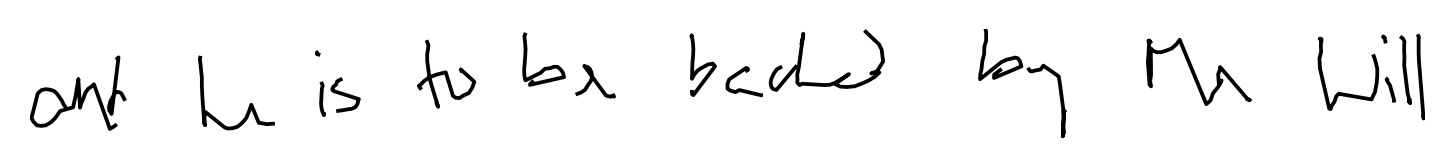

In [23]:
from scipy.interpolate import interp1d

path = "/media/data/GitHub/simple_hwr/data/prepare_online_data/original-xml-all/original/a01/a01-000/strokesu.xml"
path = "/media/data/GitHub/simple_hwr/data/prepare_online_data/line-level-xml/a01/a01-000/a01-000u-01.xml"
path = "/media/data/GitHub/simple_hwr/data/prepare_online_data/line-level-xml/a01/a01-001/a01-001w-07.xml"
window_size=80

stroke_list = get_strokes(path)
x,y = convert_stroke_list(stroke_list)

print(x,y)

coef = get_coef(x,y, "mean")
plot(stroke_list, coef, save_path=None)



In [25]:
from pathlib import Path

root = Path("/media/data/GitHub/simple_hwr/data/prepare_online_data/line-level-xml")
output = Path("/media/data/GitHub/simple_hwr/data/rerendered_online_data/v_1")
output.mkdir(parents=True, exist_ok=True)


for xml in root.rglob("*.xml"):
    output_file = (output / xml.relative_to(root)).with_suffix('.png')
    output_file.parent.mkdir(parents=True, exist_ok=True)
    main(xml, save_path=output_file)

    


ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.